In [1]:
%matplotlib ipympl

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# some handy functions to use along widgets
from IPython.display import display, Markdown, clear_output
# widget packages
import ipywidgets as widgets

In [2]:
%run pyilt.py

In [8]:
db_dir = r'./db/NMR_multitau_sphere_r=10voxels_f=0.1Tm_rho=10.0_bulk=true/NMR_multitau_min=0.10ms_max=20.0ms_pts=8_scale=manual/NMR_cpmg_t=2000.00ms_te=0.133'
filepath = os.path.join(db_dir, 'cpmg_decay.csv')
rwdata = pd.read_csv(filepath)
times = rwdata.time.values
decay = rwdata.signal.values

(-0.01, 1.0)

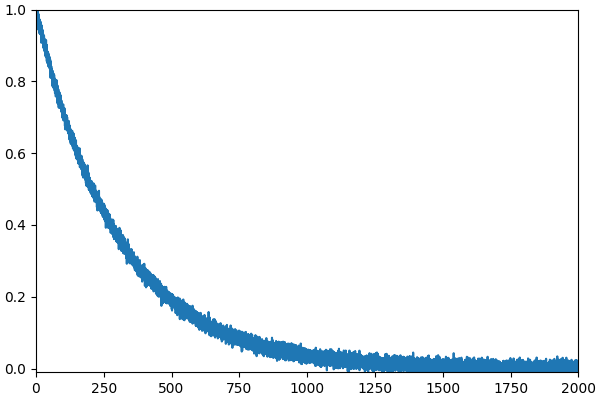

In [9]:
fig, ax = plt.subplots(figsize=(6,4),constrained_layout=True)
ax.plot(times,decay)
ax.set_xlim([0,times.max()])
ax.set_ylim([-0.01,1])

In [10]:
plt.close('all')

In [11]:
nregs = 100
bins, amps, regs, errs, solvs = lcurve(times, decay, 
                                       nregs=nregs,
                                       reglims=[-2.0,1.0],
                                       nbins=256, 
                                       tmin=1e-2,
                                       tmax=1e4,
                                       nprune=512)

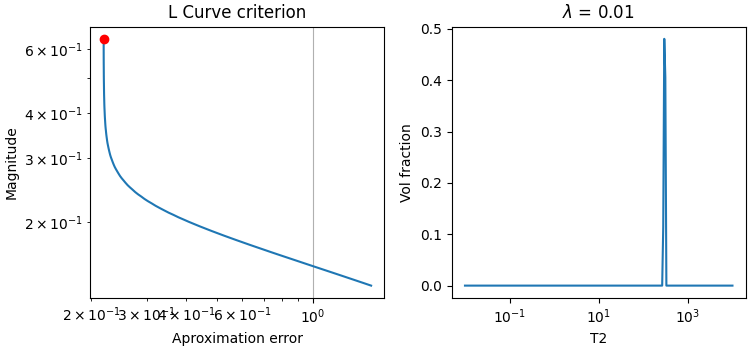

In [15]:
fig, axs = plt.subplots(1,2, figsize=(7.5,3.5), constrained_layout=True)
line, = axs[0].loglog(errs, solvs)
point, = axs[0].plot([errs[0]], [solvs[0]], marker='o', color='red')
axs[0].grid(True)
axs[0].set_title('L Curve criterion')
axs[0].set_xlabel('Aproximation error')
axs[0].set_ylabel('Magnitude')
axs[1].set_title(r'$\lambda$ = {:.2f}'.format(regs[0]))
axs[1].set_xlabel('T2')
axs[1].set_ylabel('Vol fraction')

dline, = axs[1].semilogx(bins[0,:], amps[0,:])

def update(change):
    new_idx = change.new
    point.set_xdata([errs[new_idx]])
    point.set_ydata([solvs[new_idx]])
    dline.set_xdata(bins[new_idx,:])
    dline.set_ydata(amps[new_idx,:])
    axs[1].set_title(r'$\lambda$ = {:.2f}'.format(regs[new_idx]))
    fig.canvas.draw()

int_slider = widgets.IntSlider(
    value=1,
    min=0, max=nregs-1, step=1,
    description='$\lambda$',
    continuous_update=False
)
int_slider.observe(update, 'value')
grapher = widgets.HBox([int_slider])
display(grapher)


In [16]:
plt.close('all')